In [14]:
import pandas as pd
import pickle
# Load the dataset
data = pd.read_csv('/content/test.csv')

# Display the first few rows
data.head()


,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,169277.0525,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,187758.3940,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,183583.6836,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,179317.4775,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,150730.0800,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_features = ['Neighborhood', 'BldgType', 'CentralAir']
numerical_features = ['LotArea', 'YearBuilt', 'GarageCars', 'TotRmsAbvGrd', 'FullBath', 'HalfBath']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

features = ['Neighborhood', 'LotArea', 'YearBuilt', 'BldgType', 'CentralAir', 'GarageCars', 'TotRmsAbvGrd', 'FullBath', 'HalfBath']
target = 'SalePrice'
X = data[features]
y = data[target]

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'YearBuilt',
                                                   'GarageCars', 'TotRmsAbvGrd',
                                                   'FullBath', 'HalfBath']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Neighborhood', 'BldgType',
                                                   'CentralAir'])])),
                ('regressor', LinearRegression())])

In [17]:
# Get the coefficients from the linear regression model
coefficients = model.named_steps['regressor'].coef_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame to show feature names and their coefficients
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

importance_df


,Feature,Coefficient
0,num__LotArea,9340.419822
16,cat__Neighborhood_MeadowV,7846.151546
3,num__TotRmsAbvGrd,6482.114967
8,cat__Neighborhood_BrDale,5302.466781
33,cat__BldgType_Duplex,4969.222417
25,cat__Neighborhood_Sawyer,4299.605502
19,cat__Neighborhood_NPkVill,4107.612785
18,cat__Neighborhood_NAmes,3160.677137
4,num__FullBath,2533.713086
20,cat__Neighborhood_NWAmes,2090.887690


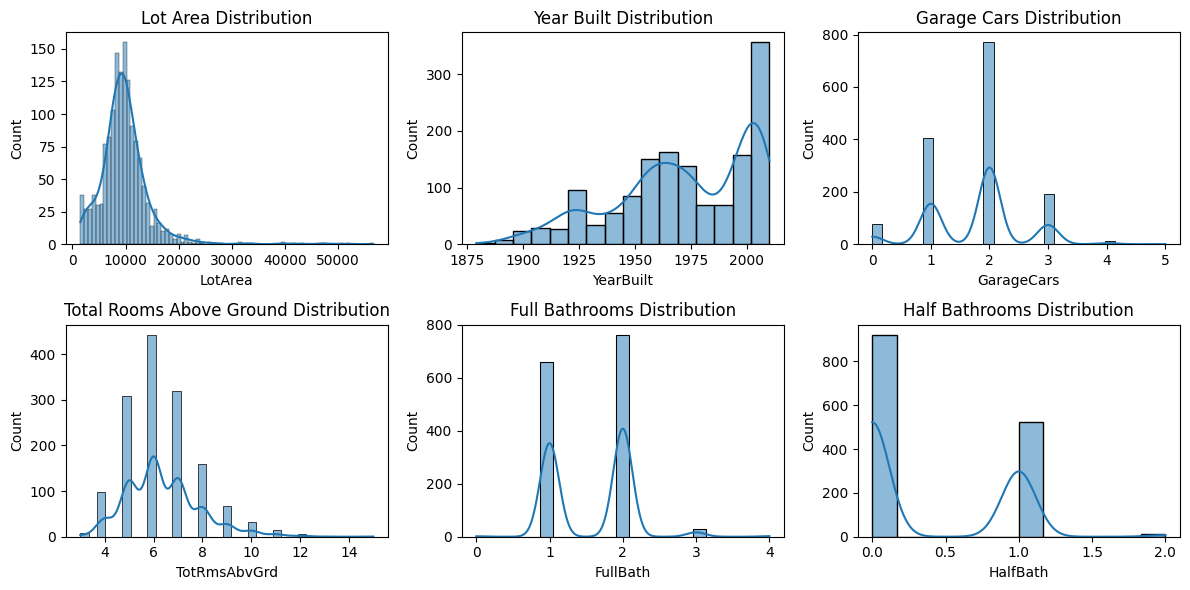

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explore the distribution of key features
plt.figure(figsize=(12, 6))

# Plot for LotArea
plt.subplot(2, 3, 1)
sns.histplot(data['LotArea'], kde=True)
plt.title('Lot Area Distribution')

# Plot for YearBuilt
plt.subplot(2, 3, 2)
sns.histplot(data['YearBuilt'], kde=True)
plt.title('Year Built Distribution')

# Plot for GarageCars
plt.subplot(2, 3, 3)
sns.histplot(data['GarageCars'], kde=True)
plt.title('Garage Cars Distribution')

# Plot for TotRmsAbvGrd
plt.subplot(2, 3, 4)
sns.histplot(data['TotRmsAbvGrd'], kde=True)
plt.title('Total Rooms Above Ground Distribution')

# Plot for FullBath
plt.subplot(2, 3, 5)
sns.histplot(data['FullBath'], kde=True)
plt.title('Full Bathrooms Distribution')

# Plot for HalfBath
plt.subplot(2, 3, 6)
sns.histplot(data['HalfBath'], kde=True)
plt.title('Half Bathrooms Distribution')

plt.tight_layout()
plt.show()

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model_rf.fit(X, y)

# Feature Importance for RandomForest
importances = model_rf.named_steps['regressor'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
0,num__LotArea,0.586598
3,num__TotRmsAbvGrd,0.222267
1,num__YearBuilt,0.072900
4,num__FullBath,0.022375
2,num__GarageCars,0.013154
5,num__HalfBath,0.009753
31,cat__BldgType_1Fam,0.006240
18,cat__Neighborhood_NAmes,0.005615
35,cat__BldgType_TwnhsE,0.005458
23,cat__Neighborhood_OldTown,0.004821


In [28]:
# Save the model to a file
model_path = 'house_price_model.pkl'
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)


In [29]:
# Save the preprocessor separately
with open('preprocessor.pkl', 'wb') as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)